In [27]:
# importovanje svih potrebih biblioteka za projekat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
%matplotlib inline

In [28]:
#ucitavanje podataka o covid19 virusu 
# prvi fajl su podaci o virusu po drzavama
# drugi fajl su podaci o virusu na dnevnom nivou za ceo svet
data = pd.read_excel('covid19.xlsx')
data2 = pd.read_excel('covid19days.xlsx');
testData = pd.read_excel('covid19-test.xlsx');
data.head() #prikaz prvih 5 redova prvog seta podataka

,Country/Region,Continent,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
0,Afghanistan,Asia,29481,618,9260,19603,324,20,419,2.10,31.41,6.67,26310,3171,12.05
1,Albania,Europe,2047,45,1195,807,52,1,36,2.20,58.38,3.77,1672,375,22.43
2,Algeria,Africa,12076,861,8674,2541,156,9,115,7.13,71.83,9.93,11147,929,8.33
3,Andorra,Europe,855,52,797,6,0,0,1,6.08,93.22,6.52,854,1,0.12
4,Angola,Africa,189,10,77,102,3,0,0,5.29,40.74,12.99,148,41,27.70


In [29]:
data2.tail()  #prikaz poslednjih 5 redova drugog seta podataka

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Day before/new deaths
149,2020-06-19,8669582,460252,4184852,4024478,181495,6289,94470,5.31,48.27,11.00,187,5020
150,2020-06-20,8828445,464506,4300164,4063775,158863,4254,115312,5.26,48.71,10.80,187,6289
151,2020-06-21,8959866,468567,4368433,4122866,131421,4061,68269,5.23,48.76,10.73,187,4254
152,2020-06-22,9097902,472155,4459666,4166081,138036,3588,91233,5.19,49.02,10.59,187,4061
153,2020-06-23,9262725,477568,4563274,4221883,164823,5413,103608,5.16,49.26,10.47,187,3588


# Estimacija uslovnih i bezuslovnih verovatnoća određenih događaja

In [30]:
# bezuslovna verovatnoca novi zarazeni po kontinentu za 24h
# prvo prikupljamo podatke o novim slucajevima u poslednja 24h za svaki kontinent 
northAmerica = 0
southAmerica = 0
europe = 0
asia = 0
africa = 0
australia = 0
for index, row in data.iterrows():
    if(row['Continent'] == 'North America'):
        northAmerica += row['New cases']
    elif(row['Continent'] == 'South America'):
        southAmerica += row['New cases']
    elif(row['Continent'] == 'Europe'):
        europe += row['New cases']
    elif(row['Continent'] == 'Africa'):
        africa += row['New cases']
    elif(row['Continent'] == 'Asia'):
        asia += row['New cases']
    elif(row['Continent'] == 'Australia/Oceania'):
        australia += row['New cases']
serija = pd.Series({'0':northAmerica, '1':southAmerica, '2':europe,'3':asia,'4':africa,'5':australia}) # napravimo vremensku seriju sa ovim podacima
print("Broj slucajeva zarazenih u poslednja 24h po kontinentima:")
serija

Broj slucajeva zarazenih u poslednja 24h po kontinentima:


0    44567
1    53340
2    18248
3    39902
4     8737
5       29
dtype: int64

Procenat zarazenih na 24h po kontinentu  Zarazeni
Severna Amerika                          0.270393
Juzna Amerika                            0.323620
Evropa                                   0.110713
Azija                                    0.242090
Afrika                                   0.053008
Australija                               0.000176


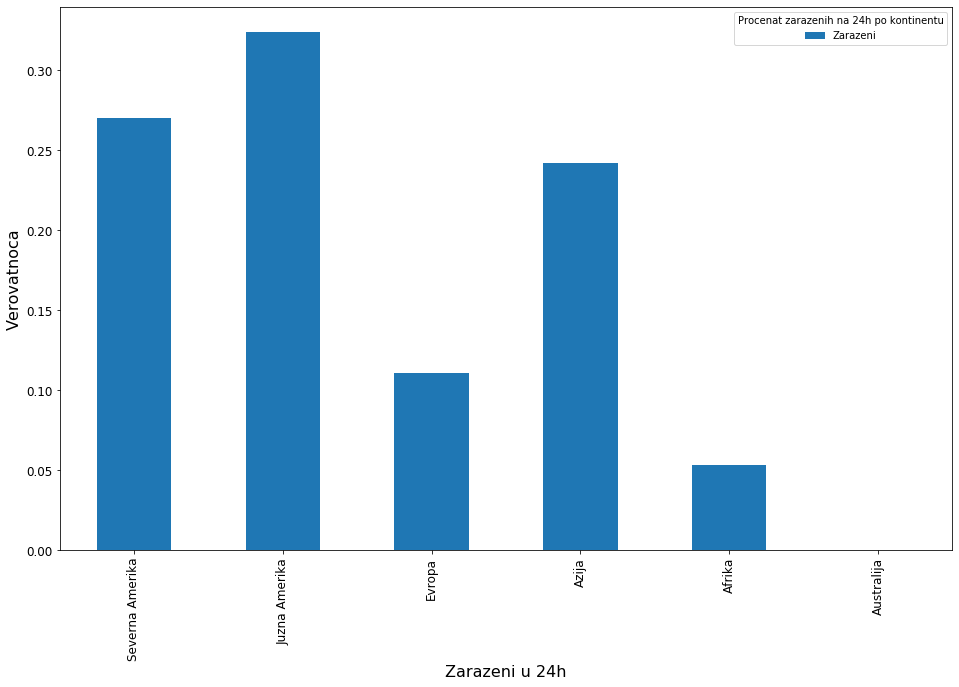

In [31]:
P_kontinenti = pd.DataFrame(serija / serija.sum()) # svaki element podelimo sa ukupnim brojem zarazenih za 24h
P_kontinenti.index = ["Severna Amerika","Juzna Amerika", "Evropa","Azija","Afrika","Australija"]
P_kontinenti.columns = ["Zarazeni"]
P_kontinenti.columns.name = "Procenat zarazenih na 24h po kontinentu"
P_kontinenti.plot.bar(figsize = (16, 10),fontsize = 12)
plt.ylabel("Verovatnoca", fontsize = 16)
plt.xlabel("Zarazeni u 24h", fontsize = 16)
print(P_kontinenti)
plt.show()

In [32]:
# bezuslovna verovatnoca gotovih slucajeva za 24h, novo izlecenih odnosno preminulih
# prikupljanje informacija o svim smrtnim slucajevima i uspesnim izlecenjima u poslednja 24h za ceo svet
deaths = (data["New deaths"]).sum()
recovered = (data["New recovered"]).sum()
total = deaths + recovered
serija2 = pd.Series({'0':deaths, '1':recovered})
serija2

0      5413
1    103608
dtype: int64

Zavrseni slucajevi  Verovatnoca
Smrti 24h              0.049651
Oporavljenih 24h       0.950349


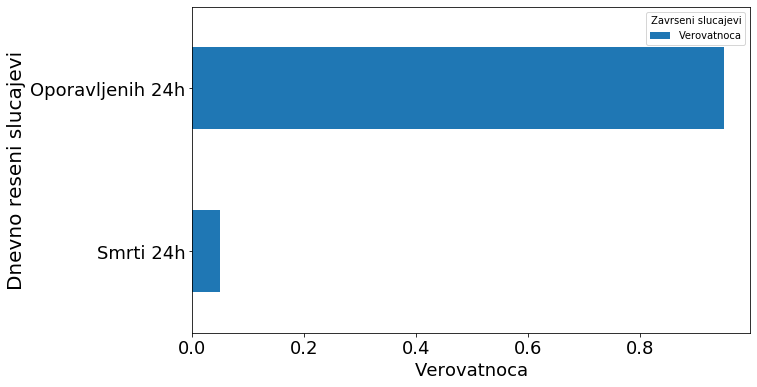

In [33]:
P_slucajevi = pd.DataFrame(serija2 / total) # delimo sa ukupnim brojem slucajeva bilo kako zavrsenih u poslednja 24h za ceo svet
P_slucajevi.index = ["Smrti 24h","Oporavljenih 24h"]
P_slucajevi.columns = ["Verovatnoca"]
P_slucajevi.columns.name = "Zavrseni slucajevi"
P_slucajevi.plot(kind='barh',figsize = (10,6), fontsize = 18)
plt.xlabel("Verovatnoca",fontsize = 18)
plt.ylabel("Dnevno reseni slucajevi",fontsize=20)
print(P_slucajevi)
plt.show()

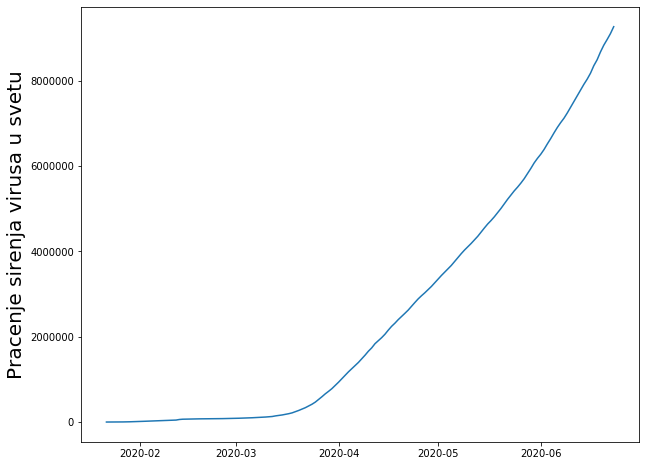

In [34]:
# Pracenje vrednosti novih zarazenih za ceo set podataka 
cases = pd.Series(data = data2['Confirmed'].values, index = data2.Date)
plt.figure(figsize = (10, 8))
plt.ylabel("Pracenje sirenja virusa u svetu",fontsize = 20)
plt.plot(cases)

In [35]:
#uslovna verovatnoca
#kolika je verovatnoca da smrtnost raste ako je zarazenih u danu > 100 000
infected = data2.loc[data2["New cases"] > 100000] # uzimamo dane kada je bilo > 100 000 zarazenih za ceo dan u svetu
rising = (infected["New deaths"] > infected["Day before/new deaths"]).value_counts() 
# utvrdjujemo da li je smrtnost tog dana porasla ili ne na osnovu uporedjivanja tog dana sa prethnodnim
rising

False    19
True     12
dtype: int64

Dnevni rast smrtnosti  Verovatnoca
Opada smrtnost            0.612903
Raste smrtnost            0.387097


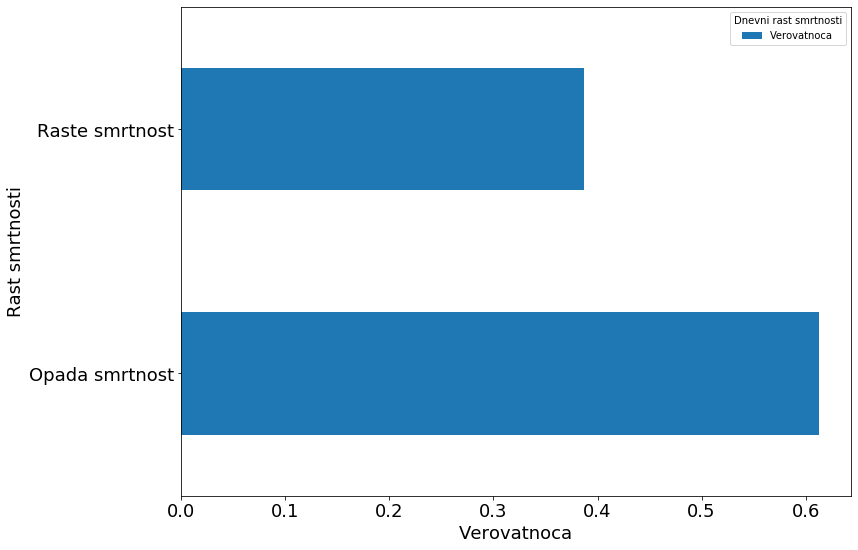

In [36]:
P_rastSmrtnosti= pd.DataFrame((rising / infected.shape[0]))
P_rastSmrtnosti.index = ["Opada smrtnost","Raste smrtnost"]
P_rastSmrtnosti.columns = ["Verovatnoca"]
P_rastSmrtnosti.columns.name="Dnevni rast smrtnosti"
P_rastSmrtnosti.plot(kind='barh', figsize = (12,9),fontsize = 18)
plt.ylabel("Rast smrtnosti", fontsize = 18)
plt.xlabel("Verovatnoca", fontsize = 18)
print(P_rastSmrtnosti)
plt.show()

# Estimacija parametara raspodela pojedinačnih promenljivih (matematičko očekivanje,varijansa, standardna devijacija, medijana, kvartili, kvantili...)

In [37]:
# za kolone Active i Recovered izracunacemo matematicko ocekivanje, varijansu, standardnu devijaciju, medijanu, kvartile, kvantile
# koristicemo gotove python funkcije iz pandas biblioteke
temp1 = data.loc[:, ["Confirmed", "Recovered"]]
temp1.describe().astype(np.int64)
# funckija .describe() automatski izracuna i prikaze karakteristicne velicine na celoj populaciji
# count - broj podataka koji nisu null
# mean - srednja vrednost
# std - standardna devijacija
# min - minimalna vrednost u skupu
# 25% - 25% percentil
# 50% - 50% percentil ili median
# 75% - 75% percentil
# max - maksimalna vrednost u skupu

,Confirmed,Recovered
count,186,186
mean,49787,24528
std,203106,79865
min,9,0
25%,671,261
50%,3103,1394
75%,22674,10924
max,2347022,647548


In [38]:
temp1.var().astype(np.int64)          #varijansa

Confirmed    41252183597
Recovered     6378442797
dtype: int64

In [39]:
temp1.quantile(0.1).astype(np.int64) # kvantili 0.1

Confirmed    79
Recovered    22
Name: 0.1, dtype: int64

In [40]:
temp1.quantile(0.9).astype(np.int64) # kvantili 0.9

Confirmed    96666
Recovered    43161
Name: 0.9, dtype: int64

# Estimacija parametara združenih raspodela (kovarijansa i koeficijent korelacije)

In [41]:
#kovarijansa E((x-E(x))(y-E(y)))
temp1.cov().astype(np.int64)

,Confirmed,Recovered
Confirmed,41252183597,14815610273
Recovered,14815610273,6378442797


In [42]:
# koeficijent korelacije
# racunamo po formuli:     P(X,Y) = Cov(X,Y) / Std(X) * Std(Y)

temp1.cov()['Confirmed']['Recovered'] / (temp1.std()['Confirmed'] * temp1.std()['Recovered'])
# pozitivan rezultat sto oznavcava da u proseku kako raste jedna velicina takodje raste i druga

0.9133531728528188

# Estimacija funkcije gustine raspodele pomoću histograma i testiranje hipoteza o raspodeli korišćenjem Kolmogorov-Smirnov testa

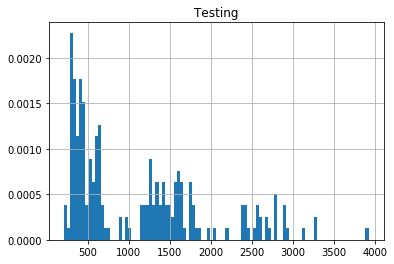

In [43]:
# 1. estimacija funkcije gustine raspodele za kolonu Testing - testiranih osoba
data_tst = testData.loc[:, ["Testing"]]
hist = data_tst.hist(normed = True, bins = 100)
plt.show()

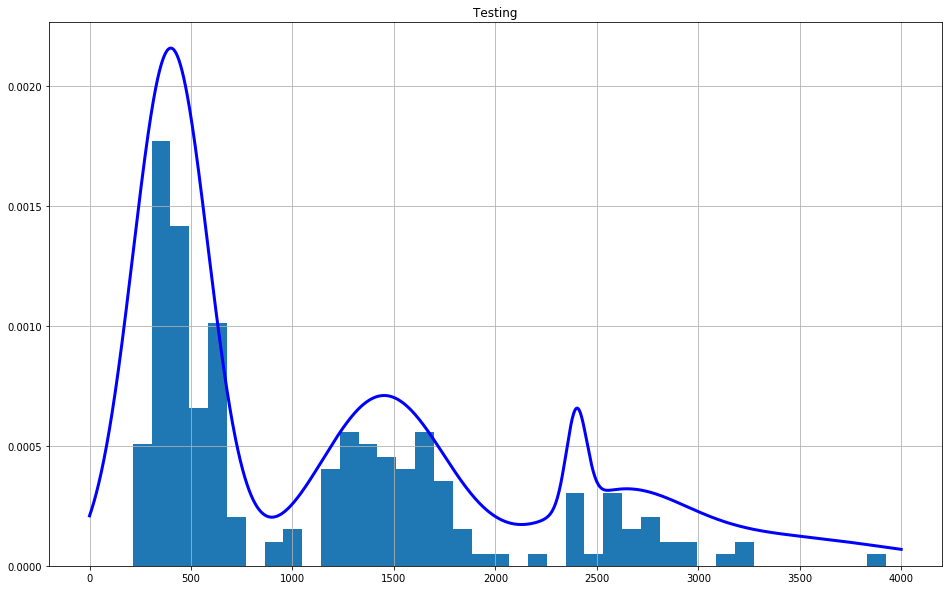

In [45]:
# 2. aproksimacija Gausovom raspodelom i Gausovom mesavinom sa adekvatnim srednjim vrednostima i varijansama
from scipy.stats import norm

# kreiramo histogram
hist = data_tst.hist(density = True,bins = 40)
korak = 0.1
x = np.arange(0, 4000, korak)

m1=400
sig1=185

m2=1450
sig2=310

m3=2400
sig3=50

m4=2600
sig4=320

m5=3300
sig5=640

# Pravimo niz verovatnoca funkcije gustine Normalne (Gausove) raspodele
P_norm_mix5 = np.array(norm.pdf(x, m1, sig1) + 0.55 * norm.pdf(x, m2, sig2) + 0.05 * norm.pdf(x, m3, sig3) + 0.2 * norm.pdf(x, m4, sig4) + 0.2 * norm.pdf(x, m5, sig5))
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.plot(x, P_norm_mix5, 'b', linewidth=3.0)
plt.show()

In [46]:
# 3. Odredjivanje da je testiranja na kraju dana izmedju 1000 i 2000 za 24h

PP = np.array([korak * z for x,z in zip(x, P_norm_mix5) if (x > 1000 and x < 2000)])
P_trazeno = PP.sum(axis = 0)
print(P_trazeno)

0.4996111700055472


In [47]:
# 4. Testiranje hipoteza o raspodeli korišćenjem Kolmogorov-Smirnov testa
from scipy import stats

# testiracemo da li je ovo normalna raspodele:

velicina_uzorka=100

# u args stavljamo ocene matematickog ocekivanja i standardne devijacije
stats.kstest(data_tst.sample(velicina_uzorka).dropna().values.T, cdf='norm',args=(data_tst.dropna().values.mean(), data_tst.dropna().values.std()))  

KstestResult(statistic=0.9997147940426032, pvalue=0.0005704119147935671)

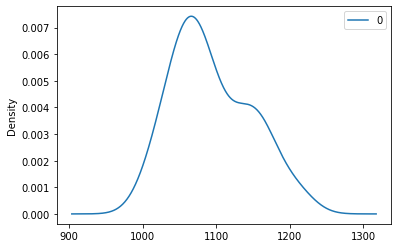

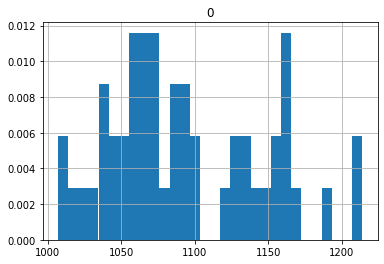

In [48]:
estimatori_srednje_vrednosti = []   #5.    

broj_estimacija_srednjih_vrednosti=50   # ovo je broj estimacija, svaki je baziran na uzorku velicine 'velicina_uzorka'
for x in range(broj_estimacija_srednjih_vrednosti):
    
    uzorak=data_tst.sample(velicina_uzorka)
    estimatori_srednje_vrednosti.append( uzorak.dropna().values.mean() )
    
# plotujemo estimaciju gustine verovatnoce raspodele srednjih vrednosti (pomocu histograma) - vidimo da je priblizno normalna!  
pd.DataFrame(estimatori_srednje_vrednosti).plot(kind="density")   

# histogram srednjih vrednosti:
hist = pd.DataFrame(estimatori_srednje_vrednosti).hist(normed = True,bins = 30) 
plt.show()

In [49]:
# 6. testiracemo da li estimatori imaju normalnu raspodelu:
stats.kstest(estimatori_srednje_vrednosti, cdf='norm',args=(data_tst.dropna().values.mean(), data_tst.dropna().values.std() / velicina_uzorka ** 0.5))

KstestResult(statistic=0.19015780810862487, pvalue=0.04670028636089568)

# Primena regresije (linearna, višestruka, nelinearna)

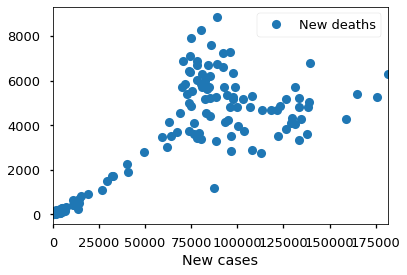

In [448]:
# Linearna regresija
# svaka tacka pokazuje raspored podataka po new cases i new deaths
dataReg = data2.loc[:, ["New cases", "New deaths","New recovered"]]
dataReg.plot('New cases', 'New deaths', style='o')
plt.show()

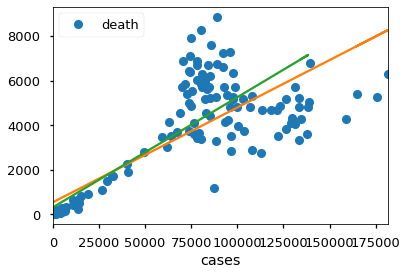

In [503]:
dataReg.columns = ['cases', 'death','recovered']
# fit() -primenjuje model na naše podatke i određuje parametre za k i n linearne funkcije f(x) + kx + n
Rez1= sm.ols('death ~ cases', dataReg).fit() # ukljucujemo svih 154 tacaka u nas model
Rez2 = sm.ols('death ~ cases', dataReg[:-10]).fit()  # bez poslednjih 10 tacaka
dataReg.plot('cases', 'death', style='o')
plt.plot(dataReg.cases, Rez1.fittedvalues)
plt.plot(dataReg.cases[:-10], Rez2.fittedvalues)

plt.show()

In [504]:
# Rezime regresije
print(Rez1.summary())
print(Rez2.summary())

                            OLS Regression Results                            
Dep. Variable:                  death   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     305.5
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           3.37e-38
Time:                        14:06:50   Log-Likelihood:                -1343.4
No. Observations:                 154   AIC:                             2691.
Df Residuals:                     152   BIC:                             2697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    537.7372    189.862      2.832      0.0

-1.4196572421049685
-1.4428893912484702


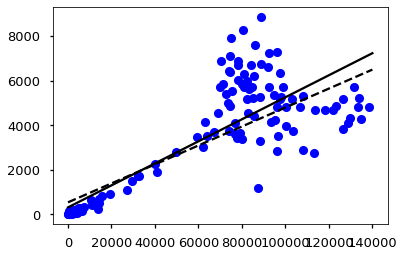

In [505]:
# importovanje biblioteke za masinsko ucenje kako bi odradili linearnu regresiju
from sklearn.linear_model import LinearRegression

# kreiramo matricu za date podatke
dataM = np.matrix( dataReg )

cln = LinearRegression()  # pravimo objekat u koji fitujemo model -10 slucajeva
org = LinearRegression()   # pravimo objekat za originalni skup

X, Y = dataM[:,1], dataM[:,0]
cln.fit( Y[:-10], X[:-10] )     # fitujemo model
org.fit( Y, X )                # sa svim podacima

print(cln.score( X[:-10], Y[:-10] ) )  # .score je R^2 indeks
print(org.score( X, Y ))
    
plt.plot( dataReg.cases[:-10], dataReg.death[:-10], 'bo') 

# Ono cemu najcesce sluzi (obuceni) model je da se vrsi posle predikcija za y u novim tackama X (skup za testiranje - test data):

# generisemo nove tacke:

test = np.c_[np.arange(0, 140000)]
plt.plot( test, cln.predict( test ), 'k' )
plt.plot( test, org.predict( test ), 'k--' )
plt.show()

In [452]:
# Ispod je prikaz racunanja Visestruke Regresije
# Racunamo zavisnost za vise od 2 promenljive, tacnije zavisnost jedne zavisne promenljive od vise nezavismih
from statsmodels.formula.api import ols

data_visestruka = dataReg

modelV = ols("cases ~ death", data_visestruka).fit() # zavisnost od dva faktora
print(modelV.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     305.5
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           3.37e-38
Time:                        13:24:05   Log-Likelihood:                -1798.6
No. Observations:                 154   AIC:                             3601.
Df Residuals:                     152   BIC:                             3607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.159e+04   3625.056      3.197      0.0

In [453]:
modelV = ols("cases ~ death + recovered", data_visestruka).fit() # zavisnost od dva faktora
print(modelV.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     917.9
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           3.17e-85
Time:                        13:24:06   Log-Likelihood:                -1685.0
No. Observations:                 154   AIC:                             3376.
Df Residuals:                     151   BIC:                             3385.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5155.4309   1762.694      2.925      0.0

In [454]:
modelV2 = ols("cases ~ death * recovered", data_visestruka).fit() # dva faktora + proizvod
print(modelV2.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     683.5
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           3.12e-87
Time:                        13:24:06   Log-Likelihood:                -1676.7
No. Observations:                 154   AIC:                             3361.
Df Residuals:                     150   BIC:                             3373.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2707.5076   1775.619     

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


w2= [-1.92340173e+03  3.96287606e+01 -3.72905264e-03]


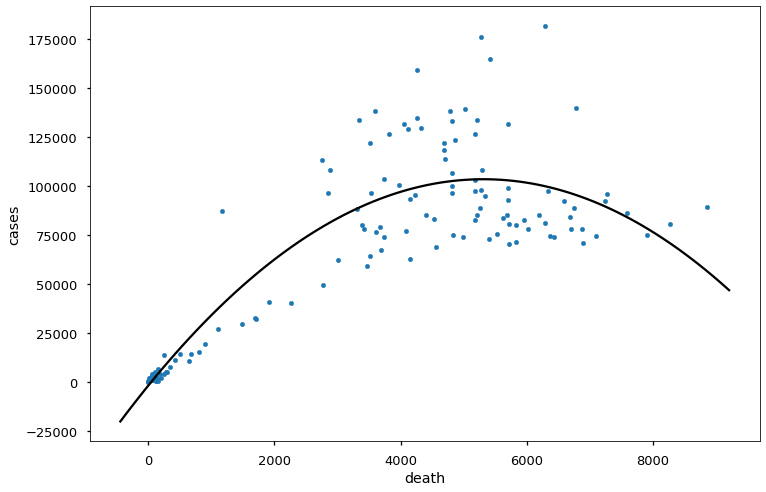

In [506]:
# Nelinearna regresija - polinomska kvadratna
# Radimo linearnu regresiju, samo dodajemo jos jedan ulazni atribut
# kvadratna regresija:

A=np.array(dataReg['death'])
A=np.array([np.ones(len(A)), A, A**2])
y=np.array(dataReg['cases'])

w2 = np.linalg.lstsq(A.T,y)[0] # nalazenje optimalnih parametara (k,n i e gresku)
print('w2=',w2)
# funkcija koja racuna fitovanu vrednost u tacki x, za date parametre w
def f2(x,w):
    return w[0]+w[1]*x+w[2]*x**2


ax=dataReg.plot(kind = 'scatter',s = 20,x = 'death',y = "cases",figsize = [12,8])
x0,x1=plt.xlim()
opseg=x1-x0
X=np.arange(x0,x1,opseg/100.)

#crtanje tacaka i kvadratne parabolicne funkcije
ax.plot(X,f2(X,w2),'k')
plt.show()